# Importing modules

In [ ]:
'''from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline'''
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestCentroid
import scipy.cluster.hierarchy as sch
from scipy import spatial
import time
import math
import copy
from scipy.spatial.distance import cdist
import random
random.seed(10)
from itertools import product
import gdown

## Load and read data

In [ ]:
gdown.download('https://docs.google.com/uc?export=download&id=16DnkCI2ORqbHR3GmEnA6BGNgyjqvHcYP','data.csv',quiet=True)

'data.csv'

In [ ]:
football_df = pd.read_csv("data.csv")

In [ ]:
football_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# Visualization

## Country Wise

In [ ]:
counts_Nationality = football_df["Nationality"].value_counts()
counts_Nationality = counts_Nationality.reset_index()
counts_Nationality.columns= ["Nations","Counts"]
counts_Nationality

,Nations,Counts
0,England,1662
1,Germany,1198
2,Spain,1072
3,Argentina,937
4,France,914
...,...,...
159,Oman,1
160,New Caledonia,1
161,Rwanda,1
162,Palestine,1


<Figure size 720x2160 with 0 Axes>

Text(0.5, 1.0, 'Nation Wise Players Counts')

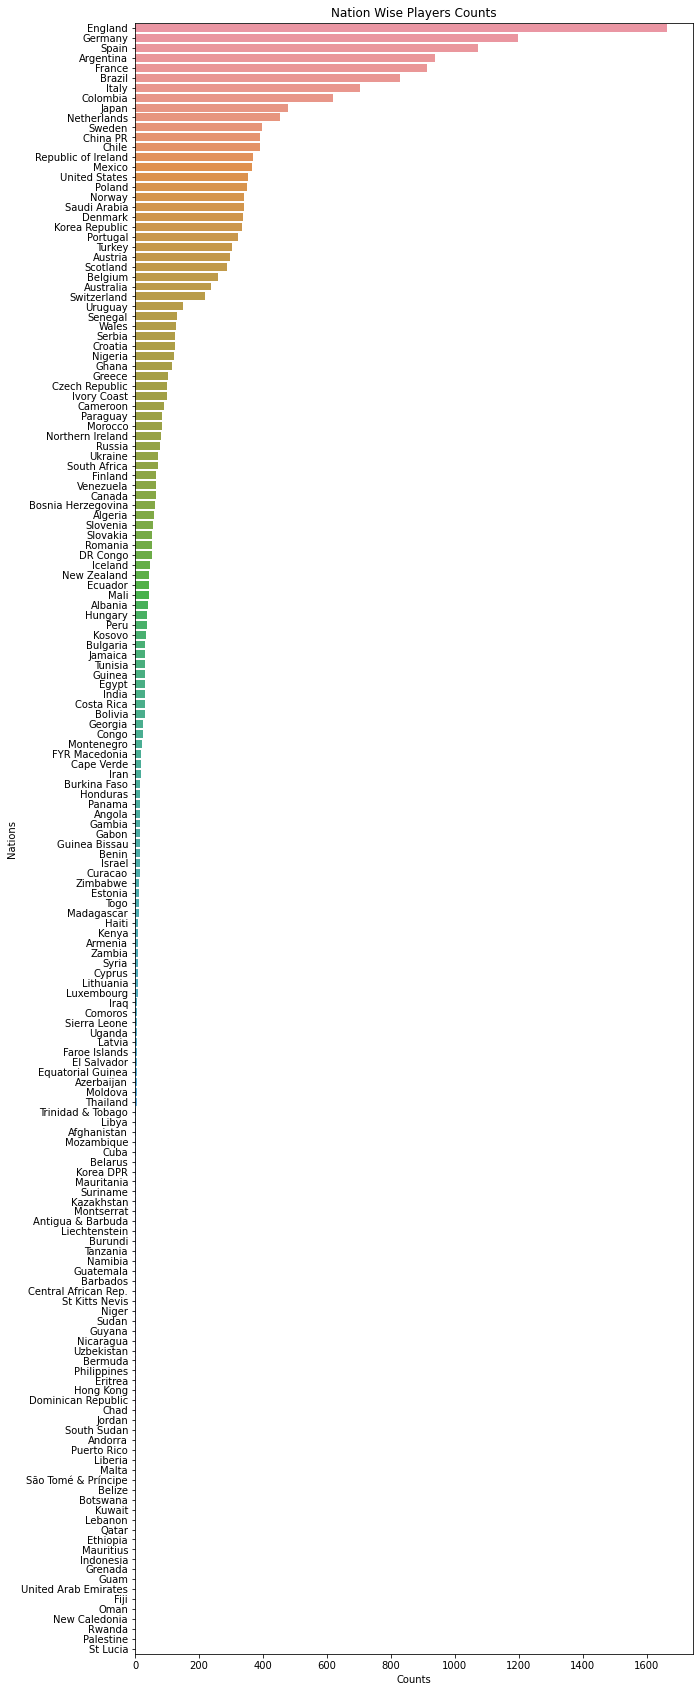

In [ ]:
plt.figure(figsize = (10, 30))
sns.barplot(x = "Counts", y = "Nations", data = counts_Nationality)
plt.title("Nation Wise Players Counts");
plt.show()

## Club Wise

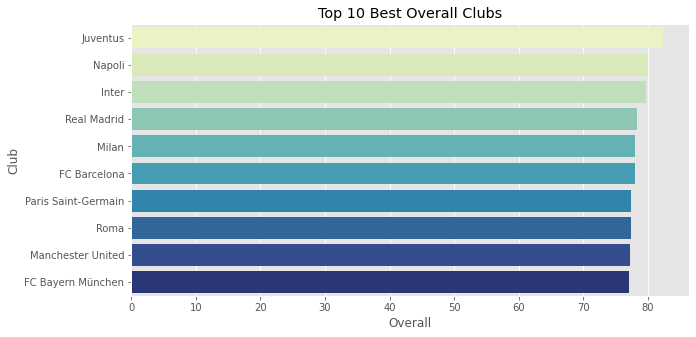

In [ ]:
highest_overall_club = football_df.groupby('Club').Overall.mean().reset_index().sort_values(by='Overall', ascending=False)
highest_overall_club

top10_clubs = highest_overall_club.head(10)
plt.figure(figsize = (10,5))
sns.barplot(x=top10_clubs.Overall, y=top10_clubs['Club'], palette='YlGnBu')
plt.title("Top 10 Best Overall Clubs");

In [ ]:
counts_clubs = football_df["Club"].value_counts()
counts_clubs = counts_clubs.reset_index()
counts_clubs.columns= ["Clubs","Counts"]

<Figure size 720x8640 with 0 Axes>

Text(0.5, 1.0, 'Clubs Wise Players Counts')

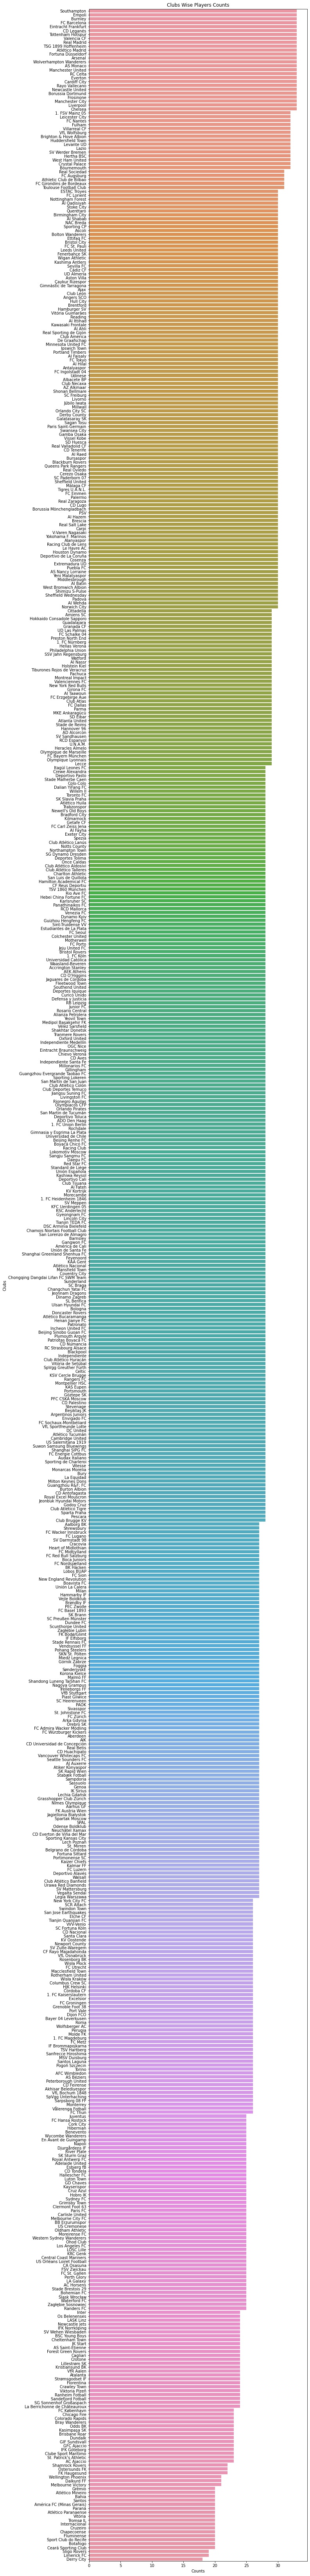

In [ ]:
plt.figure(figsize = (10, 120))
sns.barplot(x = "Counts", y = "Clubs", data = counts_clubs)
plt.title("Clubs Wise Players Counts");
plt.show()

## Position Wise

<Figure size 1080x360 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Positions')

Text(0, 0.5, 'Number of players')

Text(0.5, 1.0, 'Representation of players in different positions')

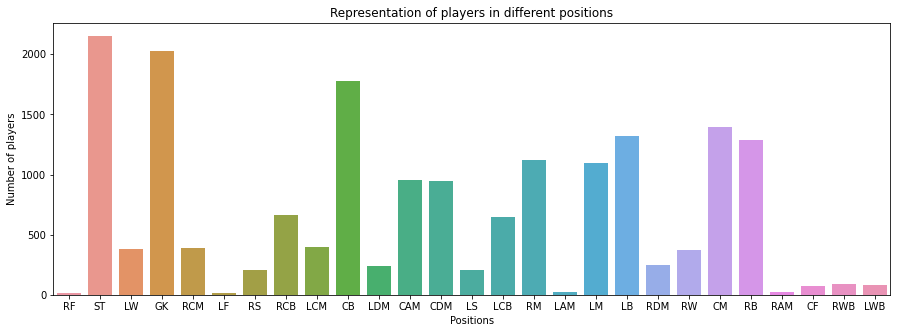

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot('Position', data=football_df)
plt.xlabel("Positions")
plt.ylabel("Number of players")
plt.title("Representation of players in different positions")
plt.show()

## Preferred foot of players

,Total Players
Foot,
Right,13948
Left,4211


<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, 'Preferred Foot')

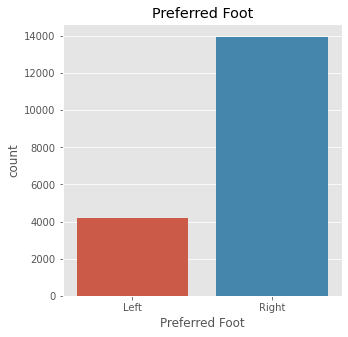

In [ ]:
preferred_foot = football_df['Preferred Foot'].value_counts().reset_index()
preferred_foot.columns = ['Foot', "Total Players"]
preferred_foot = preferred_foot.set_index('Foot')
preferred_foot
plt.figure(figsize = (5,5))
plt.style.use('ggplot')
sns.countplot(x=football_df['Preferred Foot'])
plt.title("Preferred Foot")
plt.show()

## Players's international reputaion

Text(0.5, 0, 'Countries')

Text(0, 0.5, 'Distribution of reputation')

Text(0.5, 1.0, 'Distribution of International Repuatation of players from different countries')

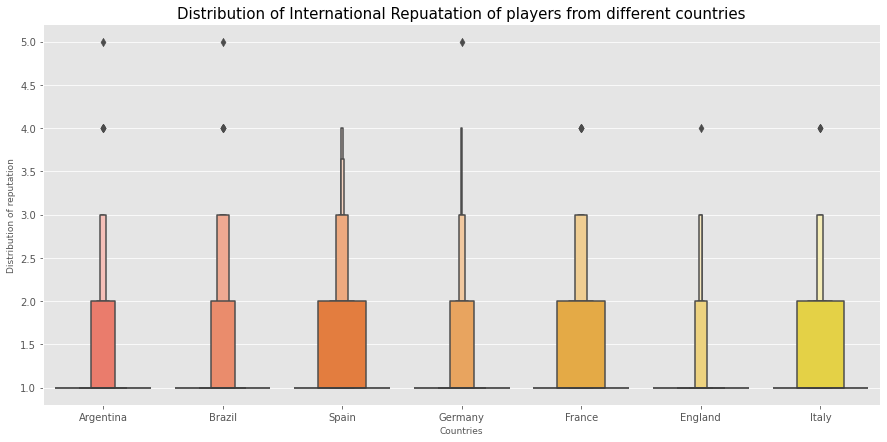

In [ ]:
some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = football_df.loc[football_df['Nationality'].isin(some_countries) & football_df['International Reputation']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.boxenplot(x = data_countries['Nationality'], y = data_countries['International Reputation'], palette = 'autumn')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Distribution of reputation', fontsize = 9)
ax.set_title(label = 'Distribution of International Repuatation of players from different countries', fontsize = 15)
plt.show()

## Height of players

<Figure size 936x576 with 0 Axes>

Text(0.5, 1.0, 'Count of players on Basis of Height')

Text(0.5, 0, 'Height in Foot per inch')

Text(0, 0.5, 'Count')

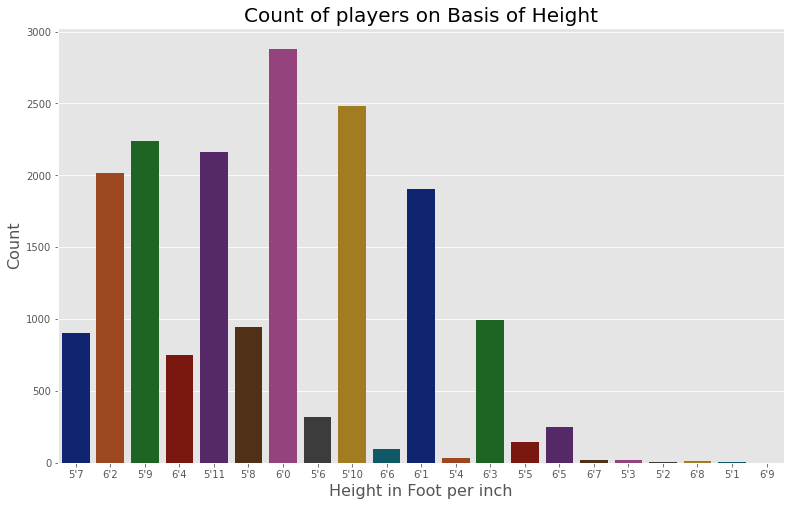

In [ ]:
# Height of Players

plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = football_df, palette = 'dark')
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

## Best 15 player by overall score

In [ ]:
# best players per each position with their age, club, and nationality based on their overall scores

football_df.iloc[football_df.groupby(football_df['Position'])['Overall'].idxmax()][
         ['Position', 'Name','Age', 'Club', 'Nationality']].style.background_gradient('Reds')

,Position,Name,Age,Club,Nationality
17,CAM,A. Griezmann,27,Atlético Madrid,France
12,CB,D. Godín,32,Atlético Madrid,Uruguay
20,CDM,Sergio Busquets,29,FC Barcelona,Spain
271,CF,Luis Alberto,25,Lazio,Spain
67,CM,Thiago,27,FC Bayern München,Spain
3,GK,De Gea,27,Manchester United,Spain
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia
35,LB,Marcelo,30,Real Madrid,Brazil
24,LCB,G. Chiellini,33,Juventus,Italy
11,LCM,T. Kroos,28,Real Madrid,Germany


## Position Wise feature of players

In [ ]:
player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Top four features for every position in football

for i, val in football_df.groupby(football_df['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<Figure size 1080x3240 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



([<matplotlib.projections.polar.ThetaTick at 0x7f3e1ce17e90>,
 [Text(0, 0, 'Balance'),
  Text(0, 0, 'Agility'),
  Text(0, 0, 'Acceleration'),
  Text(0, 0, 'BallControl'),
  Text(0, 0, 'Dribbling')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1ce8fe90>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'CAM')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1cbedbd0>,
 [Text(0, 0, 'Jumping'),
  Text(0, 0, 'Aggression'),
  Text(0, 0, 'HeadingAccuracy'),
  Text(0, 0, 'Marking'),
  Text(0, 0, 'Interceptions')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1cbf7890>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'CB')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1cb8c850>,
 [Text(0, 0, 'Aggression'),
  Text(0, 0, 'Jumping'),
  Text(0, 0, 'Balance'),
  Text(0, 0, 'BallControl'),
  Text(0, 0, 'Interceptions')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1cb92cd0>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'CDM')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1cb78350>,
 [Text(0, 0, 'Agility'),
  Text(0, 0, 'Balance'),
  Text(0, 0, 'Acceleration'),
  Text(0, 0, 'Dribbling'),
  Text(0, 0, 'BallControl')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1cb69e90>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'CF')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1cb29450>,
 [Text(0, 0, 'Balance'),
  Text(0, 0, 'Agility'),
  Text(0, 0, 'Acceleration'),
  Text(0, 0, 'BallControl'),
  Text(0, 0, 'LongPassing')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1cbce450>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'CM')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1cadac10>,
 [Text(0, 0, 'GKReflexes'),
  Text(0, 0, 'GKDiving'),
  Text(0, 0, 'GKPositioning'),
  Text(0, 0, 'GKHandling'),
  Text(0, 0, 'GKKicking')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1cb388d0>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'GK')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1ca96590>,
 [Text(0, 0, 'Agility'),
  Text(0, 0, 'Balance'),
  Text(0, 0, 'Acceleration'),
  Text(0, 0, 'Dribbling'),
  Text(0, 0, 'BallControl')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1ca8e0d0>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'LAM')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1ca5a410>,
 [Text(0, 0, 'Acceleration'),
  Text(0, 0, 'Balance'),
  Text(0, 0, 'Agility'),
  Text(0, 0, 'Jumping'),
  Text(0, 0, 'Aggression')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1ca4d690>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'LB')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1ca87f90>,
 [Text(0, 0, 'Jumping'),
  Text(0, 0, 'Aggression'),
  Text(0, 0, 'HeadingAccuracy'),
  Text(0, 0, 'Marking'),
  Text(0, 0, 'Interceptions')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1cb01790>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'LCB')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1ca3c790>,
 [Text(0, 0, 'Balance'),
  Text(0, 0, 'Agility'),
  Text(0, 0, 'BallControl'),
  Text(0, 0, 'LongPassing'),
  Text(0, 0, 'Acceleration')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1ca3ad50>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'LCM')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1c9f72d0>,
 [Text(0, 0, 'Aggression'),
  Text(0, 0, 'BallControl'),
  Text(0, 0, 'LongPassing'),
  Text(0, 0, 'Balance'),
  Text(0, 0, 'Agility')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1c9eedd0>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'LDM')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1c9b0e90>,
 [Text(0, 0, 'Balance'),
  Text(0, 0, 'Agility'),
  Text(0, 0, 'Acceleration'),
  Text(0, 0, 'Dribbling'),
  Text(0, 0, 'BallControl')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1c9a7050>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'LF')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1c9e2910>,
 [Text(0, 0, 'Acceleration'),
  Text(0, 0, 'Agility'),
  Text(0, 0, 'Balance'),
  Text(0, 0, 'Dribbling'),
  Text(0, 0, 'BallControl')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1c9650d0>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'LM')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1c956f90>,
 [Text(0, 0, 'Acceleration'),
  Text(0, 0, 'Agility'),
  Text(0, 0, 'Finishing'),
  Text(0, 0, 'Jumping'),
  Text(0, 0, 'BallControl')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1c976810>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'LS')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1c8dd4d0>,
 [Text(0, 0, 'Acceleration'),
  Text(0, 0, 'Agility'),
  Text(0, 0, 'Balance'),
  Text(0, 0, 'Dribbling'),
  Text(0, 0, 'BallControl')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1c8cffd0>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'LW')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1c8982d0>,
 [Text(0, 0, 'Acceleration'),
  Text(0, 0, 'Agility'),
  Text(0, 0, 'Balance'),
  Text(0, 0, 'Jumping'),
  Text(0, 0, 'Crossing')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1c90bdd0>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'LWB')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1c8a19d0>,
 [Text(0, 0, 'Agility'),
  Text(0, 0, 'Balance'),
  Text(0, 0, 'Acceleration'),
  Text(0, 0, 'Dribbling'),
  Text(0, 0, 'BallControl')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1c8c8bd0>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'RAM')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1c881650>,
 [Text(0, 0, 'Acceleration'),
  Text(0, 0, 'Balance'),
  Text(0, 0, 'Jumping'),
  Text(0, 0, 'Agility'),
  Text(0, 0, 'Aggression')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1c87cd50>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'RB')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1c877a50>,
 [Text(0, 0, 'Jumping'),
  Text(0, 0, 'Aggression'),
  Text(0, 0, 'HeadingAccuracy'),
  Text(0, 0, 'Marking'),
  Text(0, 0, 'Interceptions')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1c839a50>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'RCB')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1c7e6e10>,
 [Text(0, 0, 'Agility'),
  Text(0, 0, 'Balance'),
  Text(0, 0, 'BallControl'),
  Text(0, 0, 'LongPassing'),
  Text(0, 0, 'Aggression')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1c7f3250>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'RCM')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1c7b6b50>,
 [Text(0, 0, 'Aggression'),
  Text(0, 0, 'Jumping'),
  Text(0, 0, 'BallControl'),
  Text(0, 0, 'LongPassing'),
  Text(0, 0, 'Balance')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1c7a3a50>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'RDM')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1c877090>,
 [Text(0, 0, 'Agility'),
  Text(0, 0, 'Acceleration'),
  Text(0, 0, 'Balance'),
  Text(0, 0, 'BallControl'),
  Text(0, 0, 'Dribbling')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1c75be90>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'RF')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1c781d90>,
 [Text(0, 0, 'Acceleration'),
  Text(0, 0, 'Agility'),
  Text(0, 0, 'Balance'),
  Text(0, 0, 'Dribbling'),
  Text(0, 0, 'BallControl')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1c7149d0>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'RM')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1c9568d0>,
 [Text(0, 0, 'Acceleration'),
  Text(0, 0, 'Agility'),
  Text(0, 0, 'Jumping'),
  Text(0, 0, 'Finishing'),
  Text(0, 0, 'BallControl')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1c761310>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'RS')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1c6cfdd0>,
 [Text(0, 0, 'Acceleration'),
  Text(0, 0, 'Agility'),
  Text(0, 0, 'Balance'),
  Text(0, 0, 'Dribbling'),
  Text(0, 0, 'BallControl')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1c6fc990>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'RW')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1c74e5d0>,
 [Text(0, 0, 'Acceleration'),
  Text(0, 0, 'Agility'),
  Text(0, 0, 'Balance'),
  Text(0, 0, 'Jumping'),
  Text(0, 0, 'Aggression')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1c6e6490>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'RWB')

([<matplotlib.projections.polar.ThetaTick at 0x7f3e1c64fe50>,
 [Text(0, 0, 'Acceleration'),
  Text(0, 0, 'Jumping'),
  Text(0, 0, 'Finishing'),
  Text(0, 0, 'Agility'),
  Text(0, 0, 'Balance')])

([<matplotlib.projections.polar.RadialTick at 0x7f3e1c6726d0>,
 [Text(0, 0, '25'), Text(0, 0, '50'), Text(0, 0, '75')])

(0.0, 100.0)

Text(0.5, 1.1, 'ST')

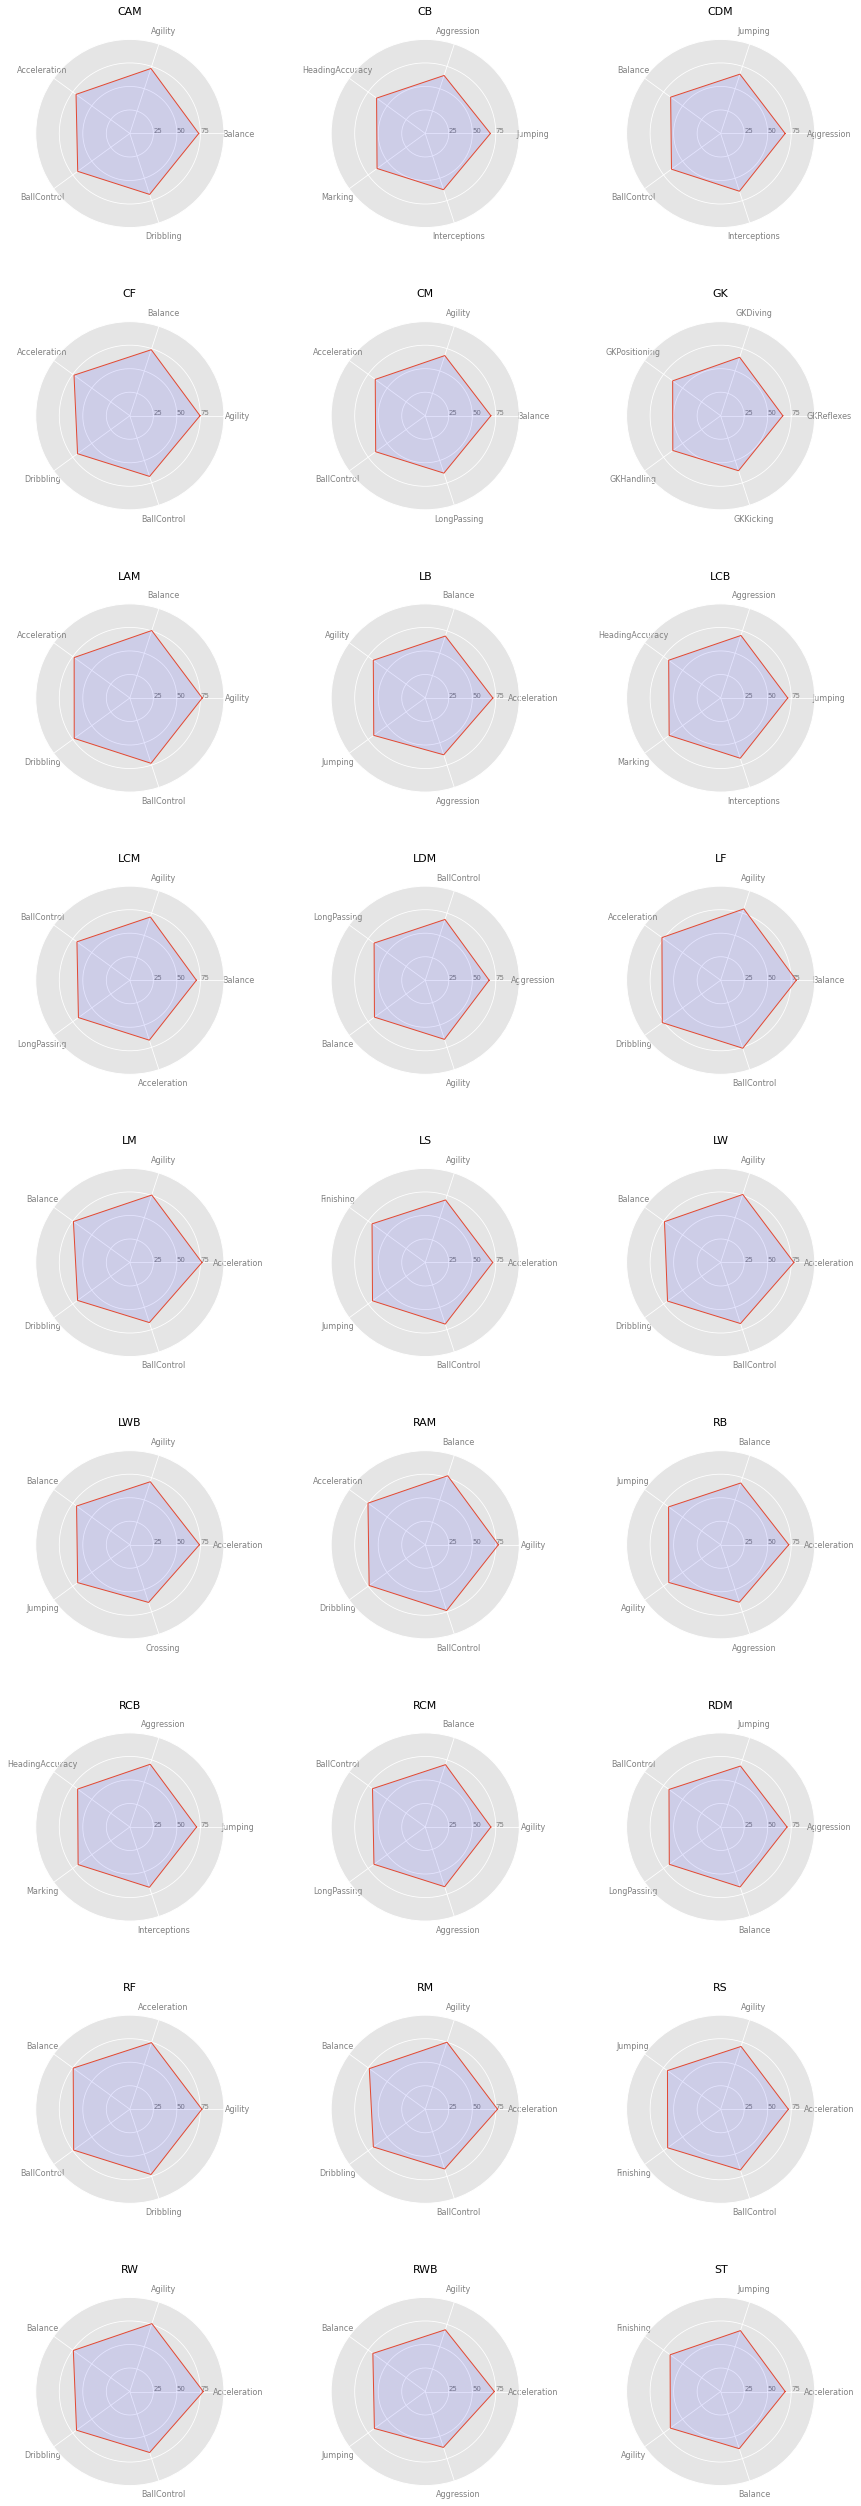

In [ ]:
from math import pi

idx = 1
plt.figure(figsize=(15,45))
for position_name, features in football_df.groupby(football_df['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 

## Top 10 Right Foot player

In [ ]:
# Top 10 Right footed footballers

football_df[football_df['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10).style.background_gradient('copper')

,Name,Age,Club,Nationality
1,Cristiano Ronaldo,33,Juventus,Portugal
2,Neymar Jr,26,Paris Saint-Germain,Brazil
3,De Gea,27,Manchester United,Spain
4,K. De Bruyne,27,Manchester City,Belgium
5,E. Hazard,27,Chelsea,Belgium
6,L. Modrić,32,Real Madrid,Croatia
7,L. Suárez,31,FC Barcelona,Uruguay
8,Sergio Ramos,32,Real Madrid,Spain
9,J. Oblak,25,Atlético Madrid,Slovenia
10,R. Lewandowski,29,FC Bayern München,Poland


## Top 10 Left Foot player

In [ ]:
# Top 10 Right footed footballers

football_df[football_df['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality']].head(10).style.background_gradient('copper')

,Name,Age,Club,Nationality
0,L. Messi,31,FC Barcelona,Argentina
13,David Silva,32,Manchester City,Spain
15,P. Dybala,24,Juventus,Argentina
17,A. Griezmann,27,Atlético Madrid,France
19,T. Courtois,26,Real Madrid,Belgium
24,G. Chiellini,33,Juventus,Italy
26,M. Salah,26,Liverpool,Egypt
28,J. Rodríguez,26,FC Bayern München,Colombia
35,Marcelo,30,Real Madrid,Brazil
36,G. Bale,28,Real Madrid,Wales


# Data Preprocessing

In [ ]:
football_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [ ]:
# show stats for numrical columns
football_df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

## Remove unnecessary numerical columns

In [ ]:
# columns to drop
to_drop = ['Unnamed: 0', 'ID', 'Jersey Number']
football_df = football_df.drop(to_drop, axis='columns')

In [ ]:
football_df.isnull().sum()

Name                 0
Age                  0
Photo                0
Nationality          0
Flag                 0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 86, dtype: int64

## Remove row having NA value 
(usually these are records of a goal keeper)

In [ ]:
football_df = football_df[football_df['Balance'].notna()]

In [ ]:
football_df.isnull().sum()

Name                 0
Age                  0
Photo                0
Nationality          0
Flag                 0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1516
Length: 86, dtype: int64

## Remove object columns

In [ ]:
nations=football_df['Nationality']
clubs=football_df['Club']
positions=football_df['Position']
football_df = football_df.select_dtypes(exclude=['object'])

In [ ]:
football_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18159 entries, 0 to 18206
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18159 non-null  int64  
 1   Overall                   18159 non-null  int64  
 2   Potential                 18159 non-null  int64  
 3   Special                   18159 non-null  int64  
 4   International Reputation  18159 non-null  float64
 5   Weak Foot                 18159 non-null  float64
 6   Skill Moves               18159 non-null  float64
 7   Crossing                  18159 non-null  float64
 8   Finishing                 18159 non-null  float64
 9   HeadingAccuracy           18159 non-null  float64
 10  ShortPassing              18159 non-null  float64
 11  Volleys                   18159 non-null  float64
 12  Dribbling                 18159 non-null  float64
 13  Curve                     18159 non-null  float64
 14  FKAccu

In [ ]:
football_df

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,2202,5.0,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,2228,5.0,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,2143,5.0,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,1471,4.0,3.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,2281,4.0,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,1307,1.0,2.0,2.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,19,47,63,1098,1.0,2.0,2.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,16,47,67,1189,1.0,3.0,2.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,17,47,66,1228,1.0,3.0,2.0,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [ ]:
nations

0        Argentina
1         Portugal
2           Brazil
3            Spain
4          Belgium
           ...    
18202      England
18203       Sweden
18204      England
18205      England
18206      England
Name: Nationality, Length: 18159, dtype: object

In [ ]:
clubs

0               FC Barcelona
1                   Juventus
2        Paris Saint-Germain
3          Manchester United
4            Manchester City
                ...         
18202        Crewe Alexandra
18203         Trelleborgs FF
18204       Cambridge United
18205        Tranmere Rovers
18206        Tranmere Rovers
Name: Club, Length: 18159, dtype: object

In [ ]:
positions

0         RF
1         ST
2         LW
3         GK
4        RCM
        ... 
18202     CM
18203     ST
18204     ST
18205     RW
18206     CM
Name: Position, Length: 18159, dtype: object

## Normalization

In [ ]:
# normalise the values in each column 
scaler = MinMaxScaler()
for col in football_df.columns:
    football_df[col] = scaler.fit_transform(football_df[[col]])

## PCA

In [ ]:
# reduce the columns to 2 
pca = PCA(n_components=2)
reduced = pd.DataFrame(pca.fit_transform(football_df))

In [ ]:
reduced

,0,1
0,-1.629775,-1.190605
1,-1.638744,-1.004145
2,-1.554992,-1.130133
3,1.735319,-0.311581
4,-1.724826,-0.415538
...,...,...
18154,0.514962,0.092116
18155,0.891898,-0.272873
18156,0.649534,-0.530304
18157,0.581251,-0.466660


# Dunn index calculation algorithm

In [ ]:
def diameter(pts):
  # need at least 3 points to construct the convex hull
  if pts.shape[0] <= 1:
    return 0
  if pts.shape[0] == 2:
    return ((pts[0] - pts[1])**2).sum()
  # two points which are fruthest apart will occur as vertices of the convex hull
  hull = spatial.ConvexHull(pts)
  candidates = pts[spatial.ConvexHull(pts).vertices]
  return spatial.distance_matrix(candidates, candidates).max()

def dunn_index(pts, labels, centroids):
  # O(k n log(n)) with k clusters and n points; better performance with more even clusters
  max_intracluster_dist = max(diameter(pts[labels==i]) for i in np.unique(labels))
  # O(k^2) with k clusters; can be reduced to O(k log(k))
  # get pairwise distances between centroids
  cluster_dmat = spatial.distance_matrix(centroids, centroids)
  # fill diagonal with +inf: ignore zero distance to self in "min" computation
  np.fill_diagonal(cluster_dmat, np.inf)
  dists = euclidean_distances(centroids)
  # print(dists)
  dists=dists.reshape(1,dists.shape[0]*dists.shape[1])
  dists.sort()
  # print(dists)
  min_intercluster_dist = dists[0,centroids.shape[0]+1] #cluster_sizes.min()
  # print(min_intercluster_dist,max_intracluster_dist)
  return min_intercluster_dist / max_intracluster_dist


# Divisive Hierarchial Clustering (DIANA)

## DIANA Algorithm

In [ ]:
# def l2_norm(x):
# 	sum = 0
# 	for i in range(len(x)):
# 		sum += x[i]**2
# 	return math.sqrt(sum)

def SimilarityMeasure(data1, data2):#,type='L2'):
  #if type=='L2':
  dist = 0
  for i in range(len(data1)):
    dist += (data1[i] - data2[i] )**2

  dist = math.sqrt(dist)
  return dist

  # if type=='Cosine':
  #   dot_prod = 0
  #   data1_mod = l2_norm(data1)
  #   data2_mod = l2_norm(data2)
  #   for x in range(len(data1)):
  #     dot_prod += data1[x]*data2[x]
  #   return (dot_prod/(data1_mod*data2_mod))
  # else:
  #   return 0

In [ ]:
def DistanceMatrix(data =None):
  Data_list = data.values.tolist()
  N = len(data)
  similarity_mat = np.zeros([N, N]) #for cosine np.ones
  for i in range(N):
    for j in range(N):
      similarity_mat[i][j]=SimilarityMeasure(Data_list[i],Data_list[j])

  return similarity_mat

In [ ]:
class DianaClustering:   
	def __init__(self,data):
		self.data = data  
		self.n_samples, self.n_features = data.shape

	def fit(self,n_clusters):
		similarity_matrix = DistanceMatrix(self.data) 
		clusters = [list(range(self.n_samples))]      
		while True:
			c_diameters = [np.max(similarity_matrix[cluster][:, cluster]) for cluster in clusters]  #cluster diameters
			max_cluster_dia = np.argmax(c_diameters) 
			max_difference_index = np.argmax(np.mean(similarity_matrix[clusters[max_cluster_dia]][:, clusters[max_cluster_dia]], axis=1))
			splinters = [clusters[max_cluster_dia][max_difference_index]] #spinter group
			last_clusters = clusters[max_cluster_dia]
			del last_clusters[max_difference_index]
			while True:
				split = False
				for j in range(len(last_clusters))[::-1]:
					splinter_distances = similarity_matrix[last_clusters[j], splinters]
					last_distances = similarity_matrix[last_clusters[j], np.delete(last_clusters, j, axis=0)]
					if np.mean(splinter_distances) <= np.mean(last_distances):
						splinters.append(last_clusters[j])
						del last_clusters[j]
						split = True
						break
				if split == False:
					break
			del clusters[max_cluster_dia]
			clusters.append(splinters)
			clusters.append(last_clusters)
			if len(clusters) == n_clusters:
				break

		cluster_labels = np.zeros(self.n_samples)
		for i in range(len(clusters)):
			cluster_labels[clusters[i]] = i

		return cluster_labels,clusters

## Applying DIANA

In [ ]:
x=reduced[:2000]
diana = DianaClustering(x) #applying the Diana Clustering algorithm
y_pred,clusters = diana.fit(3)

In [ ]:
np.unique(y_pred)

array([0., 1., 2.])

### Dunn Index 

In [ ]:
centroids=np.zeros((0,2))
x.mean(axis=0)

for i in range(0,3):
  inds=np.where(y_pred==i)[0]
  inds=inds.tolist()
  ar=np.array(x)
  mp=ar[inds].mean(axis=0)
  mp=np.array(mp).reshape(1,2)
  centroids=np.concatenate((centroids,mp),axis=0)
print('Dunn index is',dunn_index(np.array(x), y_pred, centroids))

Dunn index is 0.468819878810617


In [ ]:
for i in range(0,3):
  print('\nFor cluster',i)
  inds=np.where(y_pred==i)[0]
  inds=inds.tolist()
  nat=nations[:2000].iloc[inds]
  print('\nMost frequent nation is\n')
  print(nat.mode())
  cl=clubs[:2000].iloc[inds]
  print('\nMost frequent club is\n')
  print(cl.mode())
  pos=positions[:2000].iloc[inds]
  print('\nMost frequent position is\n')
  print(pos.mode())


For cluster 0

Most frequent nation is

0    Spain
dtype: object

Most frequent club is

0          Burnley
1       CD Leganés
2           Napoli
3      Real Madrid
4    Villarreal CF
dtype: object

Most frequent position is

0    GK
dtype: object

For cluster 1

Most frequent nation is

0    Spain
dtype: object

Most frequent club is

0    Juventus
1       Lazio
dtype: object

Most frequent position is

0    CB
dtype: object

For cluster 2

Most frequent nation is

0    Spain
dtype: object

Most frequent club is

0      Borussia Dortmund
1                Chelsea
2    Eintracht Frankfurt
3           FC Barcelona
4               FC Porto
5              Liverpool
6        West Ham United
dtype: object

Most frequent position is

0    ST
dtype: object


## Cluster visualization for DIANA

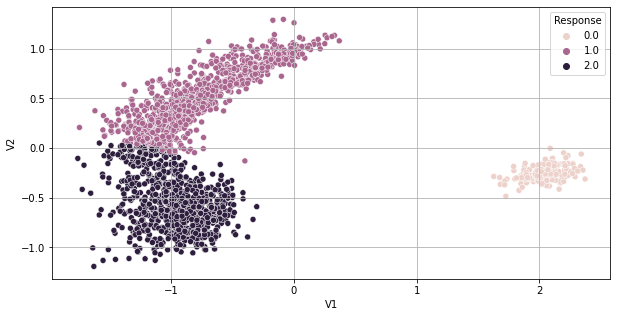

In [ ]:
dimReducedDataFrame = pd.DataFrame(x)
dimReducedDataFrame = dimReducedDataFrame.rename(columns = { 0: 'V1', 1 : 'V2', 2 : 'V3'})
dimReducedDataFrame['Response'] = y_pred

plt.figure(figsize = (10, 5))
sns.scatterplot(data = dimReducedDataFrame, x = 'V1', y = 'V2',hue = 'Response')
plt.grid(True)
plt.show()

## DIANA Clustering Dendrogram with Centroid Linkage

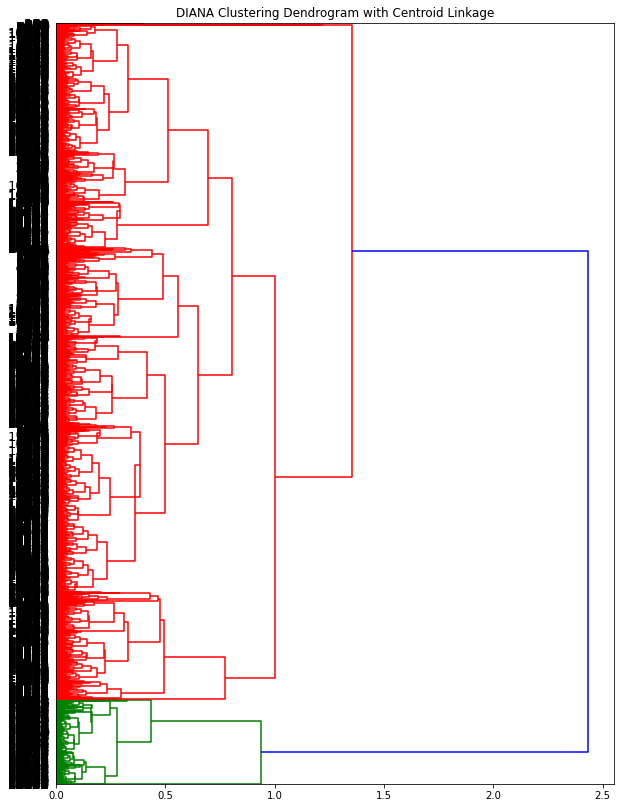

In [ ]:
plt.figure(figsize=(10,14))
plt.title('DIANA Clustering Dendrogram with Centroid Linkage')

dendrogram = sch.dendrogram(sch.linkage(reduced, method="centroid"), leaf_font_size = 13, orientation='right')

# Kmeans

In [ ]:
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='random').fit(reduced)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(football_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

## Elbow graph

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Elbow method')

Text(0.5, 0, 'number of clusters')

Text(0, 0.5, 'clusters inertia')

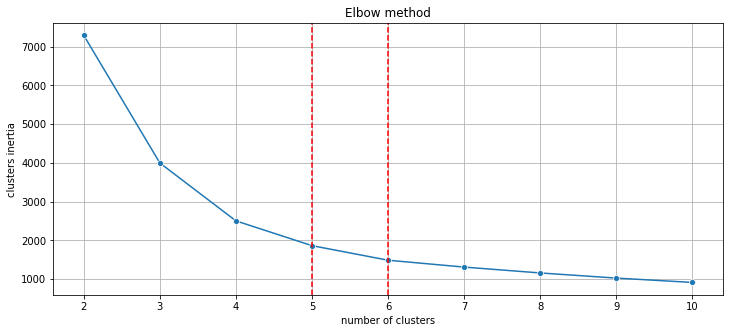

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(5, ls="--", c="red")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

## Silhouette graph

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Silhouette score method')

Text(0.5, 0, 'number of clusters')

Text(0, 0.5, 'Silhouette score')

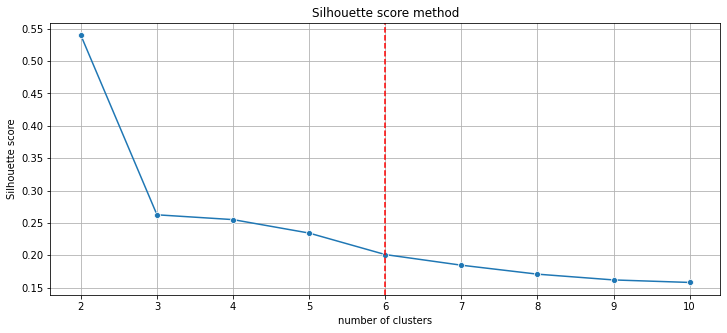

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

**From above two graph we can see the optimal cluster number is 6 so we will consider this value in next step of Kmeans**

## PCA visualization of Sklearn Kmeans algo

In [ ]:
kmeans_c6 = KMeans(n_clusters= 6, init='random')
kmeans_c6.fit(reduced)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=6,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

<Figure size 720x360 with 0 Axes>

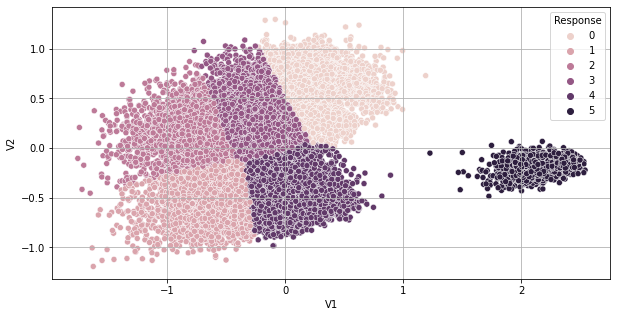

In [ ]:
dimReducedDataFrame = pd.DataFrame(reduced)
dimReducedDataFrame = dimReducedDataFrame.rename(columns = { 0: 'V1', 1 : 'V2', 2 : 'V3'})
dimReducedDataFrame['Response'] = kmeans_c6.labels_

## Plotting this
plt.figure(figsize = (10, 5))
sns.scatterplot(data = dimReducedDataFrame, x = 'V1', y = 'V2',hue = 'Response')
plt.grid(True)
plt.show()

## KMeans algo implementation

In [ ]:
class Kmeans:

    def __init__(self, n_clusters):
        self.data = pd.DataFrame()
        self.n_clusters = n_clusters
        self.centroids = pd.DataFrame()
        self.clusters = np.ndarray(1)
        self.old_centroids = pd.DataFrame()
        self.verbose = False
        self.predictions = list()

    def train(self, df, verbose):
        self.verbose = verbose
        self.data = df.copy(deep=True)
        self.clusters = np.zeros(len(self.data))

        # Randomly initialize centroids
        unique_rows = self.data.drop_duplicates()
        unique_rows.reset_index(drop=True, inplace=True)
        self.centroids = unique_rows.sample(n=self.n_clusters)
        self.centroids.reset_index(drop=True, inplace=True)

        if self.verbose:
            print("\nRandomly initiated centroids:")
            print(self.centroids)

        # Initialize old centroids as a matrix of all 0's
        self.old_centroids = pd.DataFrame(np.zeros(shape=(self.n_clusters, self.data.shape[1])),
                                          columns=self.data.columns)

        # Compare every data point in our dataset to each of the k-means and assign each point to closest cluster
        while not self.old_centroids.equals(self.centroids):
            
            if self.verbose:
                time.sleep(3)

            # Stash old centroids
            self.old_centroids = self.centroids.copy(deep=True)

            # Iterate through each data point in the matrix
            for row_i in range(0, len(self.data)):
                distances = list()
                point = self.data.iloc[row_i]

                # Calculate the distance between the current point and each of the centroids
                for row_c in range(0, len(self.centroids)):
                    centroid = self.centroids.iloc[row_c]
                    distances.append(np.linalg.norm(point - centroid))

                # Assign this data point to a cluster
                self.clusters[row_i] = np.argmin(distances)

            # For each cluster extract the values which now belong to each cluster and calculate new k-means
            for cls in range(0, self.n_clusters):

                cls_idx = np.where(self.clusters == cls)[0]

                if len(cls_idx) == 0:
                    self.centroids.loc[cls] = self.old_centroids.loc[cls]
                else:
                    # Set the new k-mean to the mean value of the data points within this cluster
                    self.centroids.loc[cls] = self.data.iloc[cls_idx].mean()
                    
                if self.verbose:
                    print("\nRow indices belonging to cluster {}: [n={}]".format(cls, len(cls_idx)))
                    print(cls_idx)

            if self.verbose:
                print("\nOld centroids:")
                print(self.old_centroids)
                print("New centroids:")
                print(self.centroids)

In [ ]:
number_of_clusters = 6
kmeans = Kmeans(n_clusters=number_of_clusters)
kmeans.train(df=reduced, verbose=True)


Randomly initiated centroids:
          0         1
0 -0.225386  0.941478
1 -0.059680  0.244731
2 -0.693165  0.215941
3 -0.412174 -0.599014
4 -0.787884  0.231310
5 -0.537495  0.577604

Row indices belonging to cluster 0: [n=1418]
[   24    44    73 ... 14491 14568 14859]

Row indices belonging to cluster 1: [n=6676]
[    3     9    18 ... 18156 18157 18158]

Row indices belonging to cluster 2: [n=1778]
[  916   952  1176 ... 15091 15153 15624]

Row indices belonging to cluster 3: [n=5590]
[    0     1     2 ... 18106 18118 18152]

Row indices belonging to cluster 4: [n=1560]
[   4    6    8 ... 8956 9552 9642]

Row indices belonging to cluster 5: [n=1137]
[   12    54    59 ... 12896 13198 13812]

Old centroids:
          0         1
0 -0.225386  0.941478
1 -0.059680  0.244731
2 -0.693165  0.215941
3 -0.412174 -0.599014
4 -0.787884  0.231310
5 -0.537495  0.577604
New centroids:
          0         1
0  0.116447  0.802370
1  0.712700  0.145139
2 -0.566646  0.121963
3 -0.333185 -0.55830

In [ ]:
np.unique(kmeans.clusters)

array([0., 1., 2., 3., 4., 5.])

In [ ]:
# Extract the results
kmeans.centroids

,0,1
0,0.296707,0.614571
1,2.151000,-0.195728
2,-0.255633,0.358950
3,0.015596,-0.474231
4,-0.619928,-0.556975
5,-0.812394,0.163658


In [ ]:
for i in range(0,6):
  print('\nFor cluster',i)
  inds=np.where(kmeans.clusters==i)[0]
  inds=inds.tolist()
  nat=nations.iloc[inds]
  print('\nMost frequent nation is\n')
  print(nat.mode())
  cl=clubs.iloc[inds]
  print('\nMost frequent club is\n')
  print(cl.mode())
  pos=positions.iloc[inds]
  print('\nMost frequent position is\n')
  print(pos.mode())


For cluster 0

Most frequent nation is

0    England
dtype: object

Most frequent club is

0    Bray Wanderers
dtype: object

Most frequent position is

0    CB
dtype: object

For cluster 1

Most frequent nation is

0    England
dtype: object

Most frequent club is

0            Burton Albion
1    Sporting de Charleroi
dtype: object

Most frequent position is

0    GK
dtype: object

For cluster 2

Most frequent nation is

0    England
dtype: object

Most frequent club is

0    New England Revolution
dtype: object

Most frequent position is

0    LB
dtype: object

For cluster 3

Most frequent nation is

0    England
dtype: object

Most frequent club is

0    Boyacá Chicó FC
1    Crewe Alexandra
2    Tranmere Rovers
dtype: object

Most frequent position is

0    ST
dtype: object

For cluster 4

Most frequent nation is

0    Brazil
dtype: object

Most frequent club is

0    Eintracht Frankfurt
1       SV Werder Bremen
2      Vitória Guimarães
3         Wigan Athletic
dtype: object

Most 

### Dunn Index

In [ ]:
print('Dunn index is',dunn_index(np.array(reduced), kmeans.clusters, kmeans.centroids))

Dunn index is 0.3604181014900615


## PCA visualization of our implemented Kmeans algo

<Figure size 720x360 with 0 Axes>

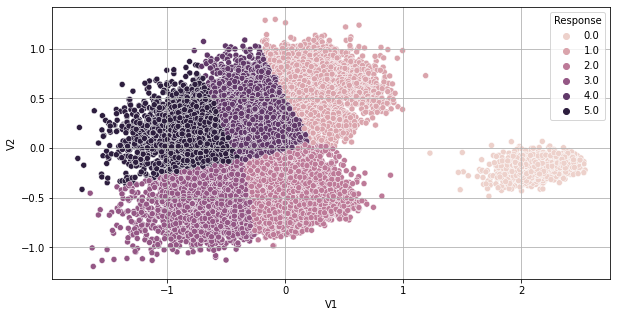

In [ ]:
dimReducedDataFrame = pd.DataFrame(reduced)
dimReducedDataFrame = dimReducedDataFrame.rename(columns = { 0: 'V1', 1 : 'V2', 2 : 'V3'})
dimReducedDataFrame['Response'] = kmeans.clusters

## Plotting this
plt.figure(figsize = (10, 5))
sns.scatterplot(data = dimReducedDataFrame, x = 'V1', y = 'V2',hue = 'Response')
plt.grid(True)
plt.show()

**Our Kmeans algorithm is giving similar results like sklearn's kmeans algorithm and we can see that by looking at the cluster formation in the above picture . the cluster are very similar only the labels may have been interchangea bit**

# Agglomerative Hierarchial Clustering (AGNES)

## Average Agglomerative Clustering(AAC)

In [ ]:
hc = AgglomerativeClustering(affinity = 'euclidean', linkage ='average')

y_hc = hc.fit_predict(reduced)

In [ ]:
np.unique(y_hc)

array([0, 1])

### Dunn Index 

In [ ]:
clf = NearestCentroid()
clf.fit(reduced, y_hc)
print('Dunn index is',dunn_index(np.array(reduced), y_hc, clf.centroids_))

Dunn index is 0.7127777676146178


### PCA visualzation for AAC 



<Figure size 720x360 with 0 Axes>

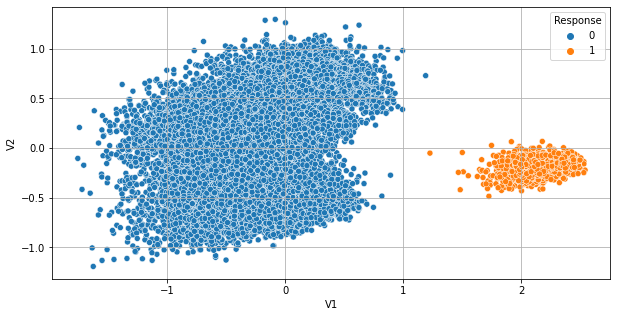

In [ ]:
dimReducedDataFrame = pd.DataFrame(reduced)
dimReducedDataFrame = dimReducedDataFrame.rename(columns = { 0: 'V1', 1 : 'V2', 2 : 'V3'})
dimReducedDataFrame['Response'] = y_hc

## Plotting this
plt.figure(figsize = (10, 5))
sns.scatterplot(data = dimReducedDataFrame, x = 'V1', y = 'V2',hue = 'Response')
plt.grid(True)
plt.show()

**Basically the nearest point forms a cluster in agglomerative clusterig and by looking at the above data as we can see it is giving two cluster as expected**

### Average linkage dendogram

<Figure size 3600x1440 with 0 Axes>

Text(0.5, 1.0, 'Player Dendrograms')

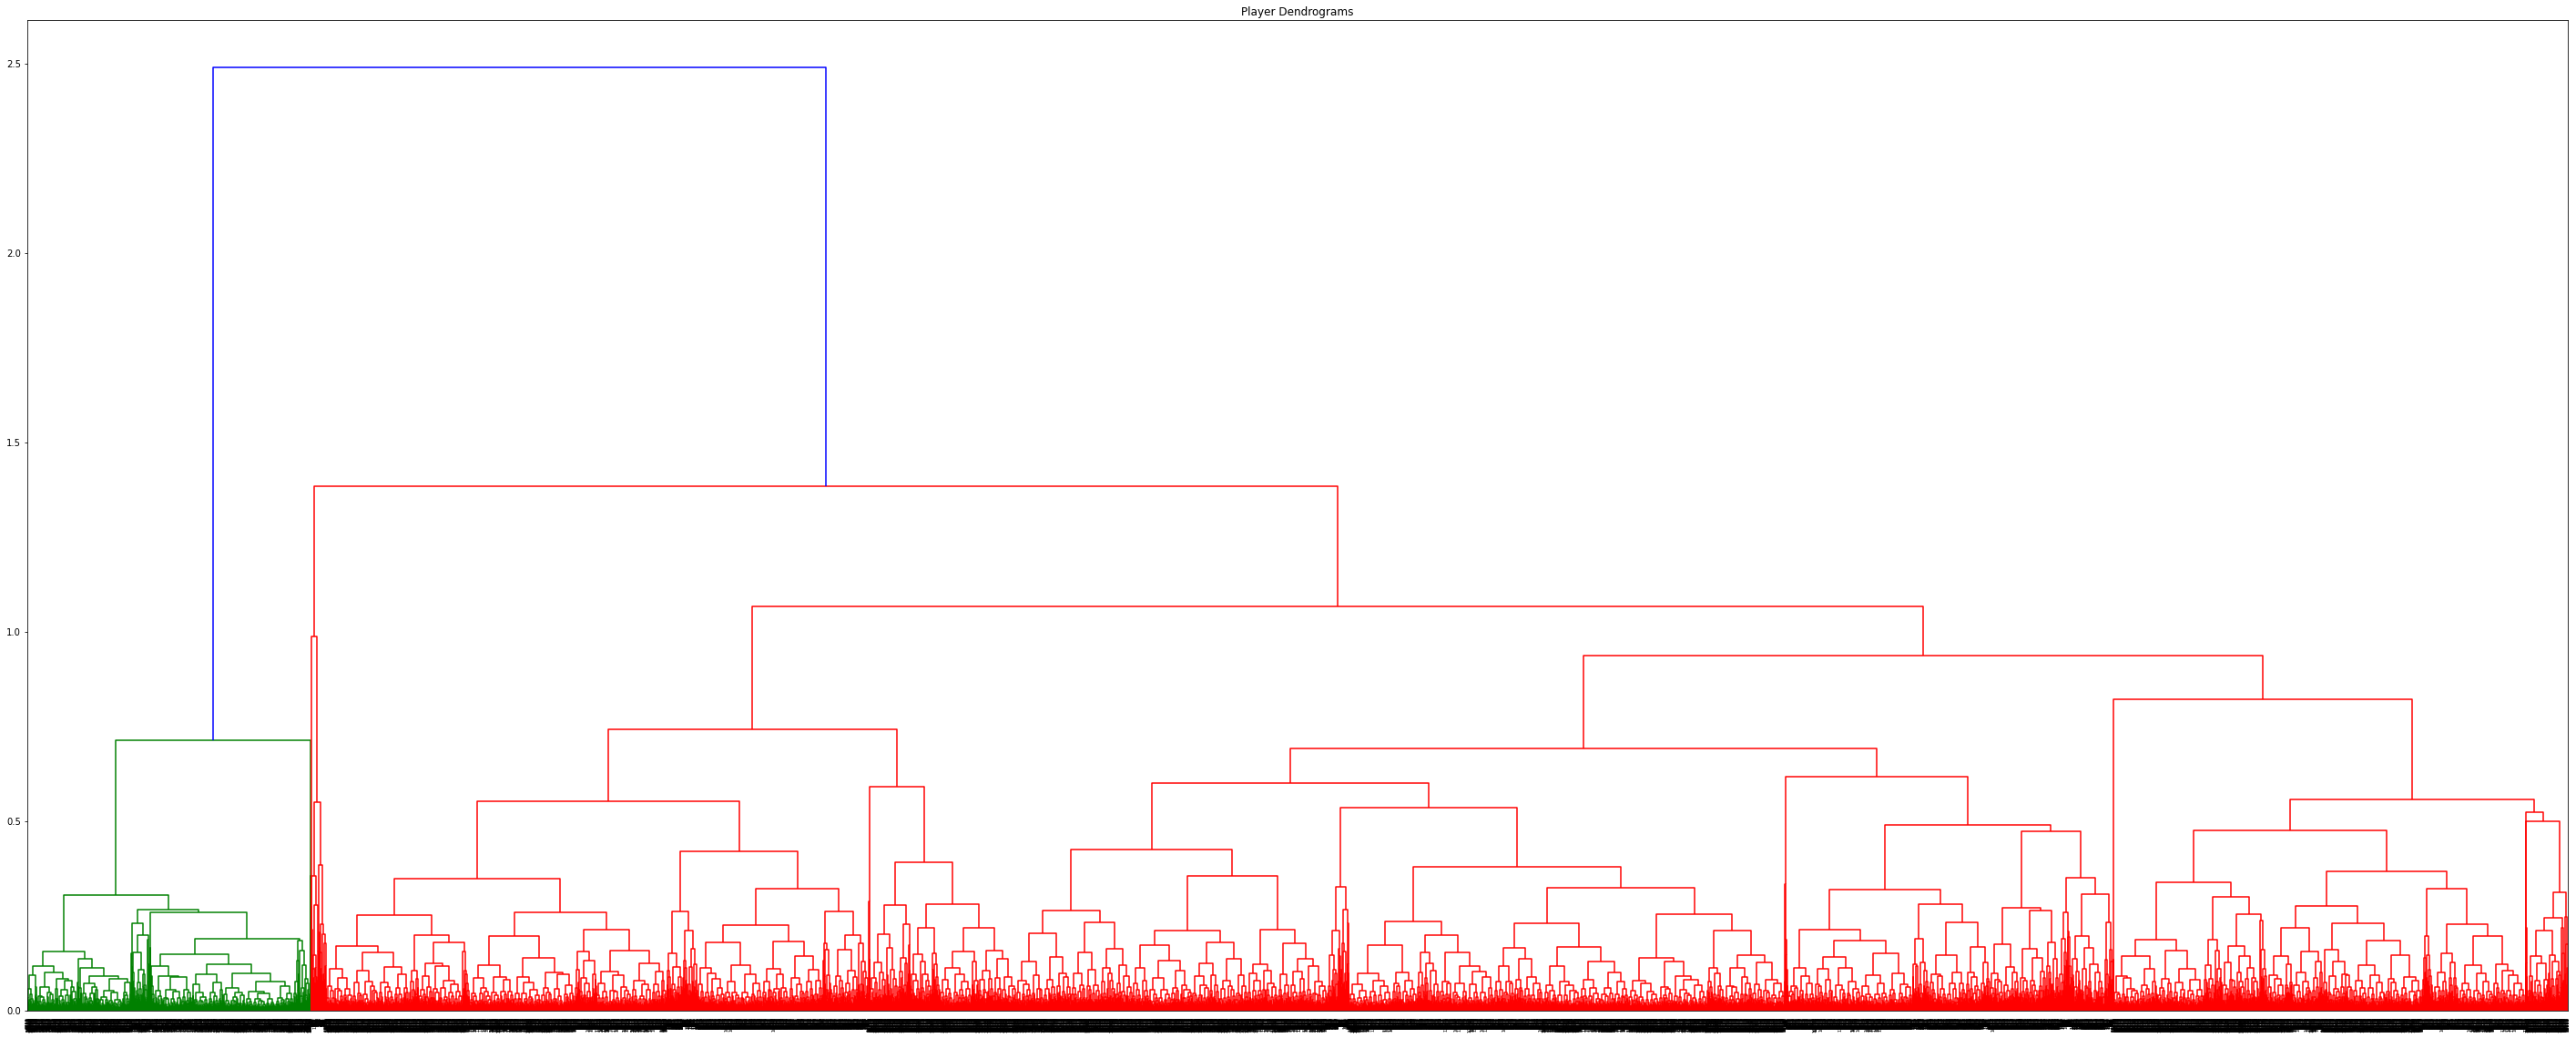

In [ ]:
plt.figure(figsize=(50, 20))
plt.title("Player Dendrograms")
dend = shc.dendrogram(shc.linkage(reduced, method='average'))

## Complete Agglomerative Clustering(CAC)

In [ ]:
hc = AgglomerativeClustering(affinity = 'euclidean', linkage ='complete')

y_hc = hc.fit_predict(reduced)

In [ ]:
np.unique(y_hc)

array([0, 1])

In [ ]:
for i in range(0,2):
  print('\nFor cluster',i)
  inds=np.where(y_hc==i)[0]
  inds=inds.tolist()
  nat=nations.iloc[inds]
  print('Most frequent nation is\n',nat.mode())
  cl=clubs.iloc[inds]
  print('Most frequent club is\n',cl.mode())
  pos=positions.iloc[inds]
  print('Most frequent position is\n',pos.mode())


For cluster 0
Most frequent nation is
 0    England
dtype: object
Most frequent club is
 0                 Arsenal
1         Atlético Madrid
2       Borussia Dortmund
3            Cardiff City
4               Frosinone
5               Liverpool
6       Manchester United
7                RC Celta
8          Rayo Vallecano
9     TSG 1899 Hoffenheim
10        West Ham United
dtype: object
Most frequent position is
 0    ST
dtype: object

For cluster 1
Most frequent nation is
 0    England
dtype: object
Most frequent club is
 0            Burton Albion
1    Sporting de Charleroi
dtype: object
Most frequent position is
 0    GK
dtype: object


### Dunn Index 

In [ ]:
clf = NearestCentroid()
clf.fit(reduced, y_hc)
print('Dunn index is',dunn_index(np.array(reduced), y_hc, clf.centroids_))

Dunn index is 0.7127777676146178


### PCA visualzation for CAC 

<Figure size 720x360 with 0 Axes>

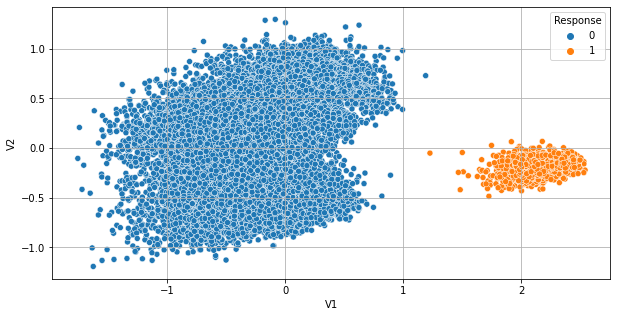

In [ ]:
dimReducedDataFrame = pd.DataFrame(reduced)
dimReducedDataFrame = dimReducedDataFrame.rename(columns = { 0: 'V1', 1 : 'V2', 2 : 'V3'})
dimReducedDataFrame['Response'] = y_hc

## Plotting this
plt.figure(figsize = (10, 5))
sns.scatterplot(data = dimReducedDataFrame, x = 'V1', y = 'V2',hue = 'Response')
plt.grid(True)
plt.show()

### Complete linkage dendogram

<Figure size 3600x1440 with 0 Axes>

Text(0.5, 1.0, 'Player Dendrograms')

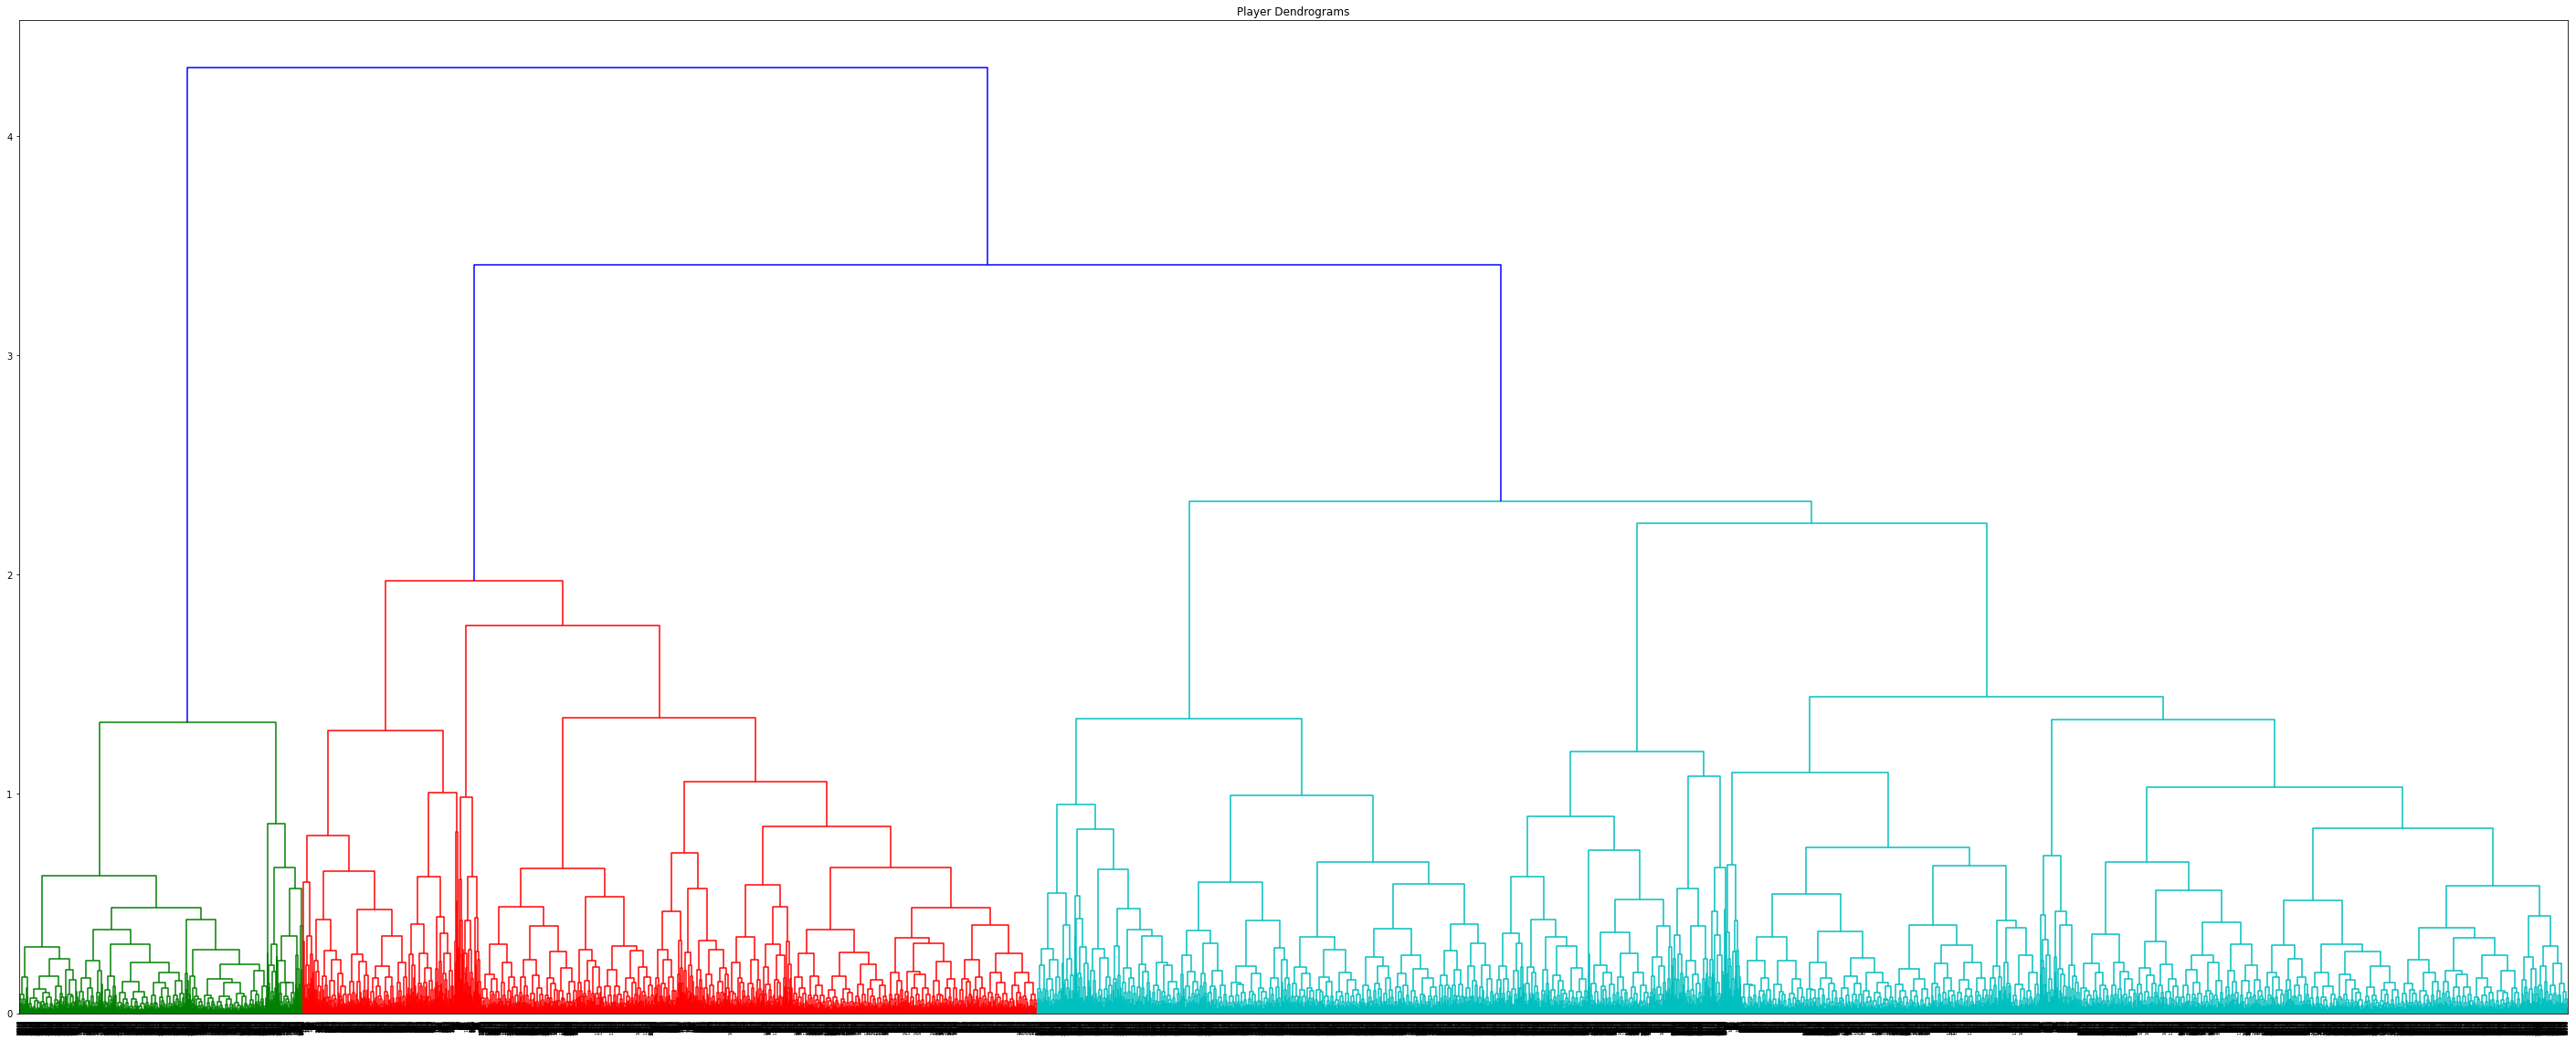

In [ ]:
plt.figure(figsize=(50, 20))
plt.title("Player Dendrograms")
dend = shc.dendrogram(shc.linkage(reduced, method='complete'))

## Dendogram for all players with overall rating more than 85

In [ ]:
name = football_df['Name']
tdf = football_df.drop(['Name'], axis='columns')
tdf = tdf[((df['Overall'] > 85) & (df['Position'] != 'GK'))]
tdf.shape

(67, 39)

In [ ]:
# reduce the columns to 2 
pca = PCA(n_components=2)
reduced = pd.DataFrame(pca.fit_transform(tdf))

In [ ]:
# create a distance matrix
dist_matrix = euclidean_distances(reduced, reduced)
Z = hierarchy.linkage(dist_matrix, 'complete')

In [ ]:
# create labels for dendrogram leaves
def leaf_label(id):
    return '[%s]' % (tdf['Name'][id])

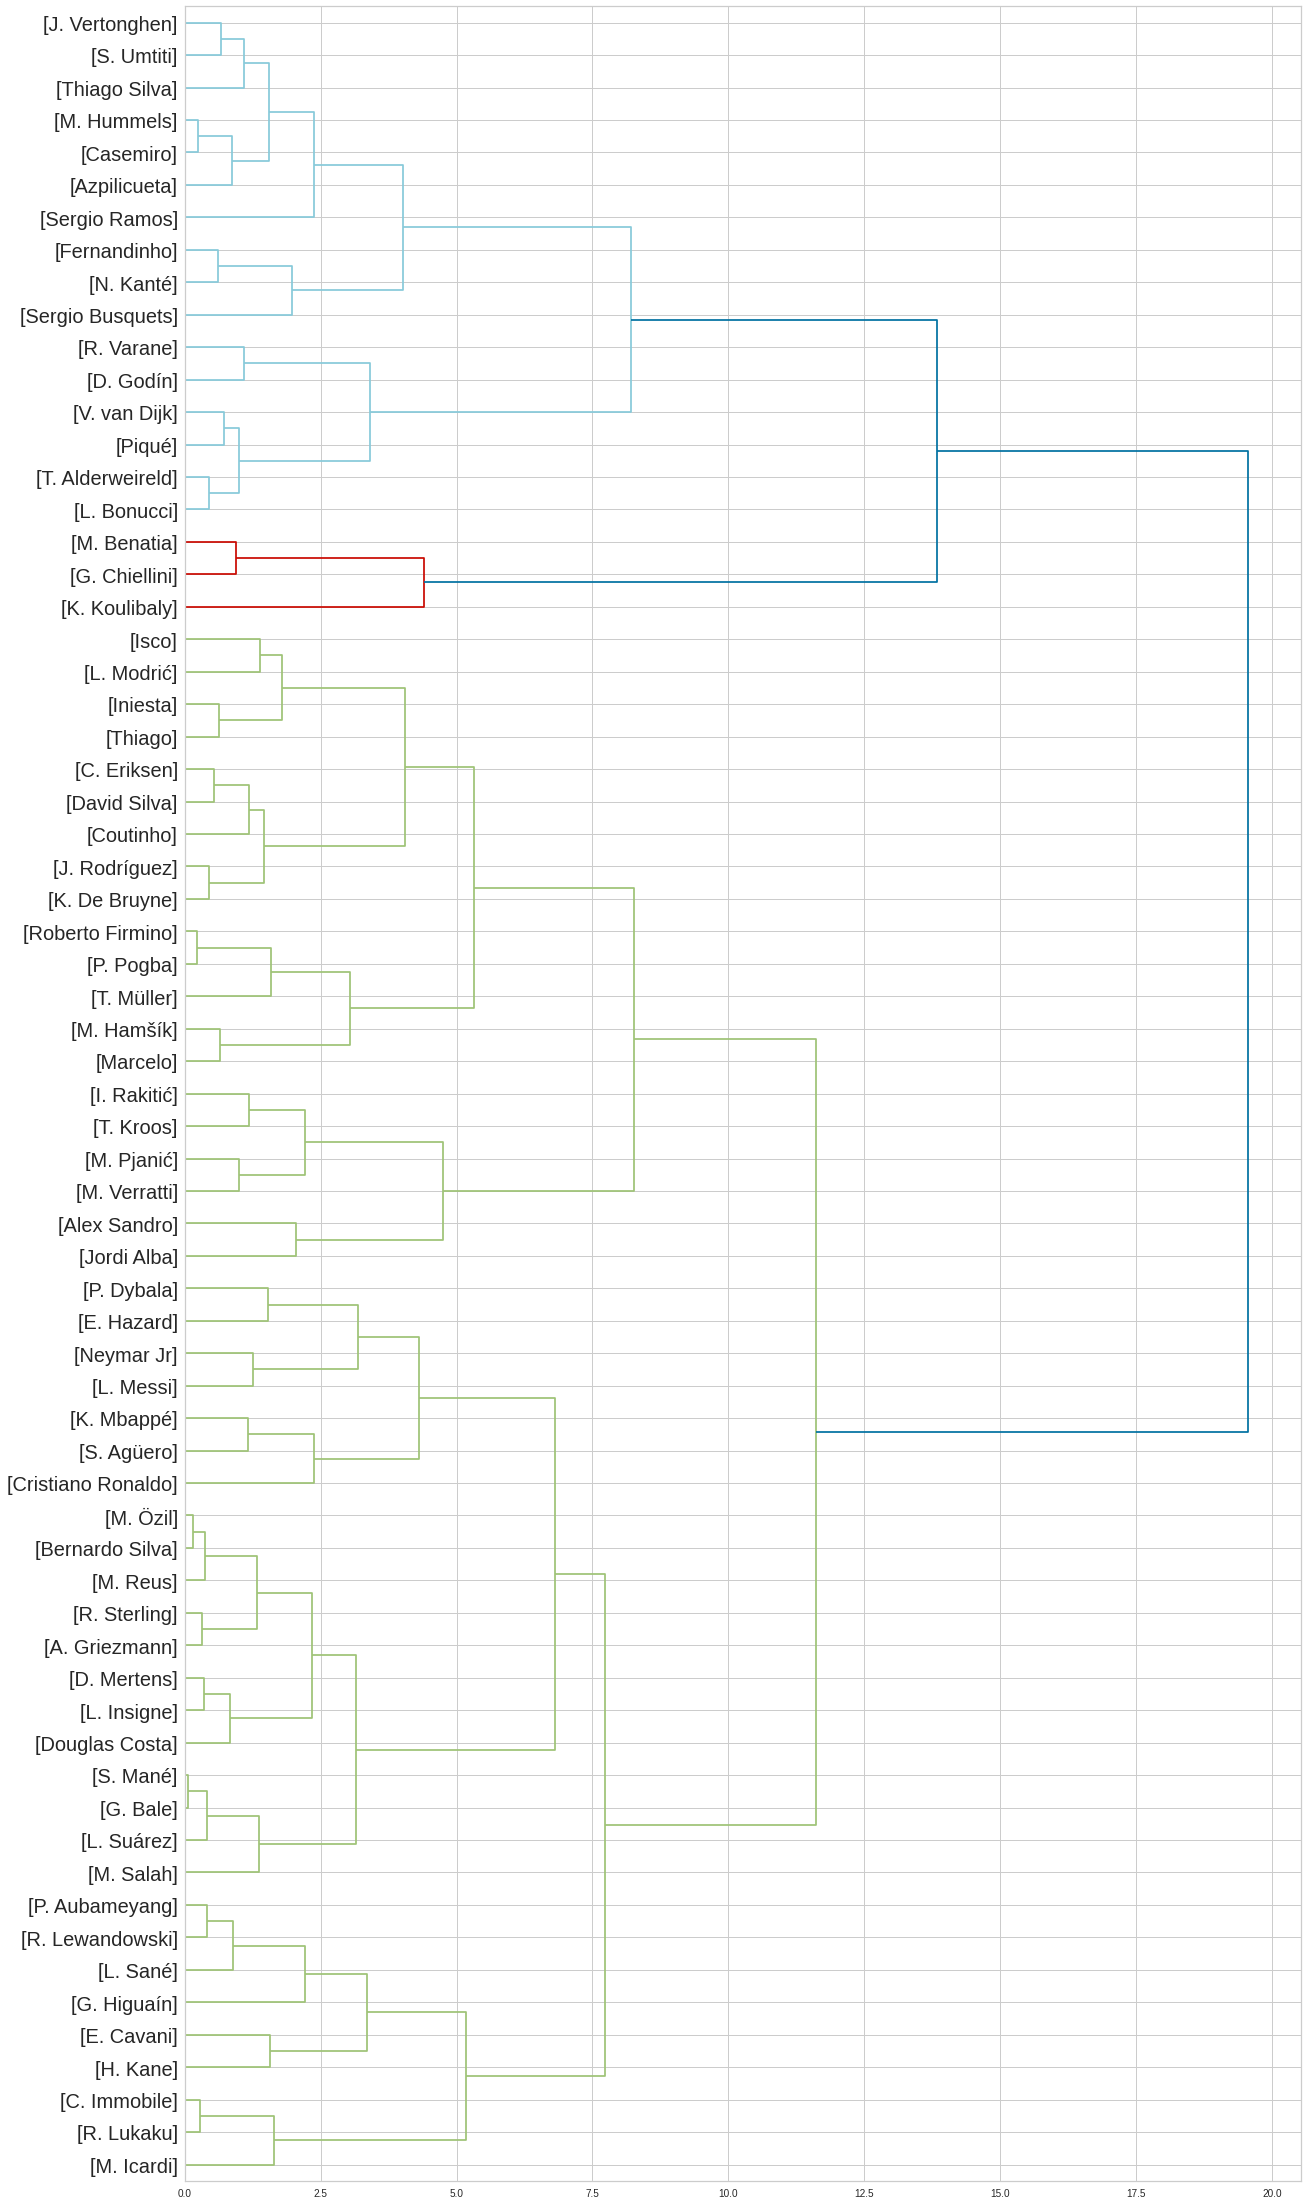

In [ ]:
# show dendrogram
plt.figure(figsize= (20,40))
dendrogrm = hierarchy.dendrogram(Z, leaf_label_func=leaf_label, leaf_rotation=0, 
                                 leaf_font_size=20, orientation='right' )

# DBSCAN

## Grid Search to tune the parameter

In [ ]:
# iterating to determine best parameters
eps = np.arange(0.1, 1, 0.05)
min_samples = np.arange(3, 11)
db_params = list(product(eps, min_samples))
sil_score = []
num_clusters =[]
dbscan_params = []

for params in db_params:
    db_scan  = DBSCAN(eps=params[0], min_samples=params[1])
    db_scan.fit(reduced)
    num_labels = len(np.unique(db_scan.labels_))
    if num_labels != 1:
        dbscan_params.append(params)
        num_clusters.append(num_labels)
        score = silhouette_score(reduced, db_scan.labels_)
        sil_score.append(score)

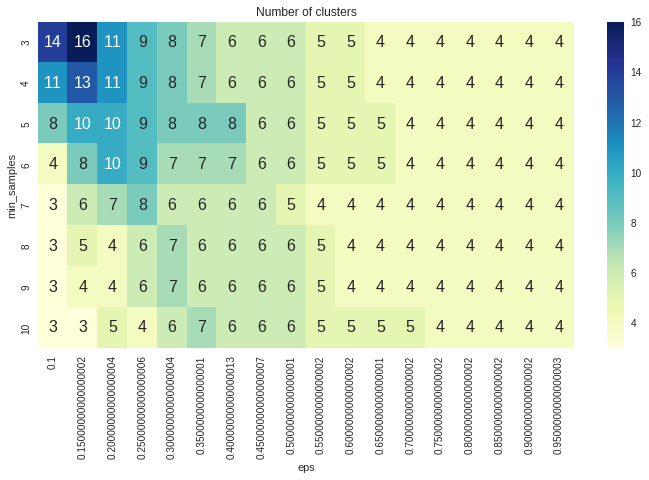

In [ ]:
# plot heatmap number of clusters  per parameter
tmp = pd.DataFrame.from_records(dbscan_params, columns =['eps', 'min_samples'])   
tmp['No_of_clusters'] = num_clusters

pivot = pd.pivot_table(tmp, values='No_of_clusters', index='min_samples', columns='eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

**Here Number of cluster is ranging from 4-16**

## Find best eps, min_samples

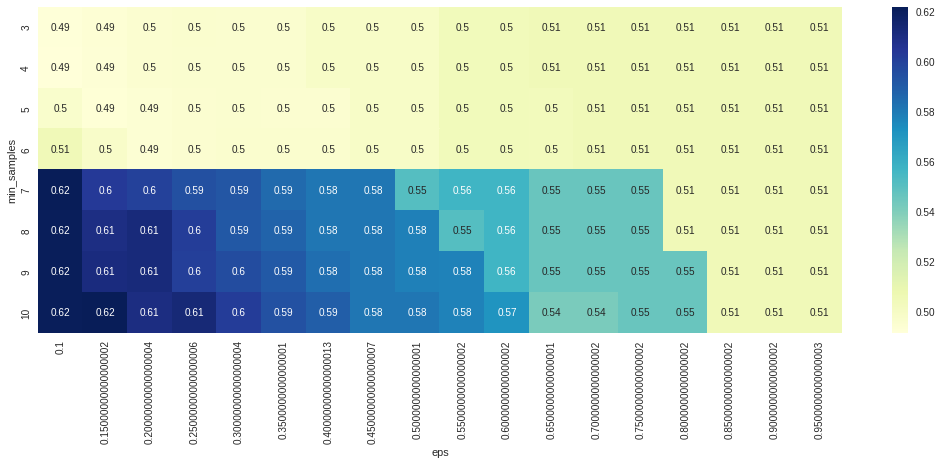

In [ ]:
# plot heatmap of silhouette score per parameter
tmp = pd.DataFrame.from_records(dbscan_params, columns =['eps', 'min_samples'])   
tmp['Sil_score'] = sil_score

pivot = pd.pivot_table(tmp, values='Sil_score', index='min_samples', columns='eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

**Highest silhouette score 0.62 can be found for eps = 0.1 and min_samples 7-10**


## Run DBSCAN

In [ ]:
# use best parameters to fit data
dbscan = DBSCAN(eps=0.1, min_samples=7)
db=dbscan.fit(reduced)
labels=db.labels_

In [ ]:
np.unique(labels)

array([-1,  0,  1])

In [ ]:
for i in range(-1,2):
  print('\nFor cluster',i)
  inds=np.where(labels==i)[0]
  inds=inds.tolist()
  nat=nations.iloc[inds]
  print('\nMost frequent nation is\n')
  print(nat.mode())
  cl=clubs.iloc[inds]
  print('\nMost frequent club is\n')
  print(cl.mode())
  pos=positions.iloc[inds]
  print('\nMost frequent position is\n')
  print(pos.mode())


For cluster -1

Most frequent nation is

0     Belgium
1     England
2       Italy
3    Portugal
dtype: object

Most frequent club is

0       Juventus
1    Real Madrid
dtype: object

Most frequent position is

0    RCB
dtype: object

For cluster 0

Most frequent nation is

0    England
dtype: object

Most frequent club is

0            Burton Albion
1    Sporting de Charleroi
dtype: object

Most frequent position is

0    GK
dtype: object

For cluster 1

Most frequent nation is

0    England
dtype: object

Most frequent club is

0                Arsenal
1           Cardiff City
2              Frosinone
3              Liverpool
4               RC Celta
5         Rayo Vallecano
6    TSG 1899 Hoffenheim
7        West Ham United
dtype: object

Most frequent position is

0    ST
dtype: object


## Formed cluster and count

In [ ]:
# show cluster sizes
dbscan_cluster_size = reduced.groupby('dbscan_cluster').size().to_frame()
dbscan_cluster_size.columns= ['dbscan_cluster']
dbscan_cluster_size

,dbscan_cluster
dbscan_cluster,
-1,92
0,2019
1,16042
2,6


**Here total cluster found is 4, where 3 are the actual cluster having 2019, 16042 and 6 data records and 92 records has been considered as noise points or we can say these are outliers**

# Observations on cluster Quality

In [5]:
from tabulate import tabulate

table = [["DIANA",3,0.469,'GK,CB,ST','Spain,Spain,Spain','Real Madrid,Juventus,FC Barcelona'],
         ["KMEANS",6,0.360,'CB,GK,LB,ST,ST,CM','England,England,England,England,Brazil,Spain','Bray Wanderers,Burton Albion,New England Revolution,Boyacá Chicó FC,Vitória Guimarães,Manchester United'],
         ["AGNES",2,0.713,'ST,GK','England,England','Arsenal,Burton Albion'],
         ["DBSCAN",3,"NA",'RCB,GK,ST','Belgium,England,England','Juventus,Burton Albion,Arsenal']]
print(tabulate(table, headers=["Algorithm","No of Cluster", "Cluster Quality(Dunn Index value)",'Positions','Nations','Clubs']))

Algorithm      No of Cluster  Cluster Quality(Dunn Index value)    Positions          Nations                                       Clubs
-----------  ---------------  -----------------------------------  -----------------  --------------------------------------------  -------------------------------------------------------------------------------------------------------
DIANA                      3  0.469                                GK,CB,ST           Spain,Spain,Spain                             Real Madrid,Juventus,FC Barcelona
KMEANS                     6  0.36                                 CB,GK,LB,ST,ST,CM  England,England,England,England,Brazil,Spain  Bray Wanderers,Burton Albion,New England Revolution,Boyacá Chicó FC,Vitória Guimarães,Manchester United
AGNES                      2  0.713                                ST,GK              England,England                               Arsenal,Burton Albion
DBSCAN                     3  NA                                   RCB

**Based on the values of the Dunn index calculated for each clustering technique, it is clear that the best clustering method is the AGNES clustering since it has the highest Dunn index.**

**Also, the clusters formed can be categorized most accurately based on the postions played by the players.**